In [1]:
import os
import importlib

import cfGPR
import vonkarmanFT as vk
import plotGPR

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy.optimize as opt
from scipy.spatial.ckdtree import cKDTree

8138 4069 4069


/home/austinfortino/DESworkspace/plotGPR.py:834: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/austinfortino/DESworkspace/plotGPR.py:838: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/austinfortino/DESworkspace/plotGPR.py:842: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/austinfortino/DESworkspace/plotGPR.py:853: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/austinfortino/DESworkspace/plotGPR.py:860: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/austinfortino/DESworkspace/plotGPR.py:861: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/austinfortino/DESworkspace/plotGPR.py:862: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u

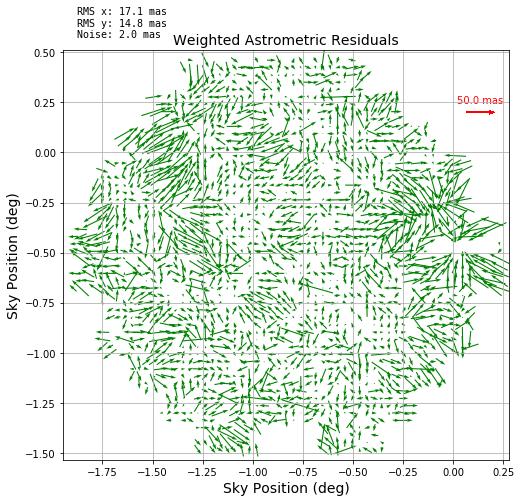

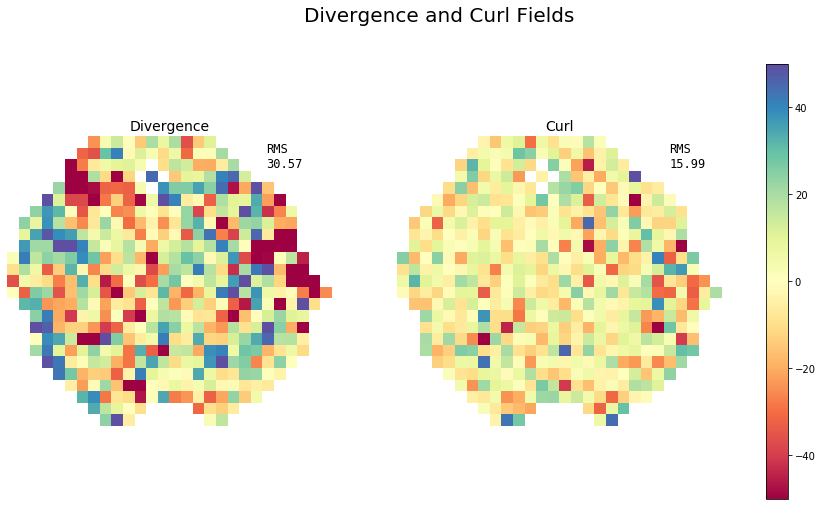

4069 Stars Evaluated...
For the first 39 separation bins...
                    E-Mode    B-Mode    xi_+      
Mean Observed       429.594   -6.812    422.782   
Std  Observed       131.267   143.783   190.879   



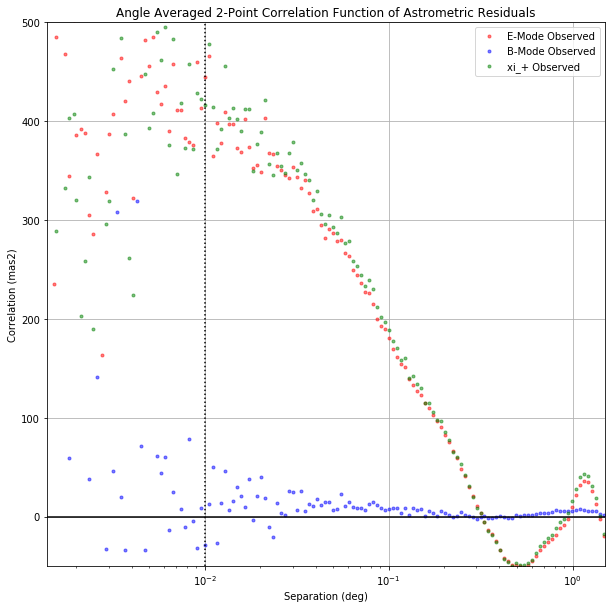

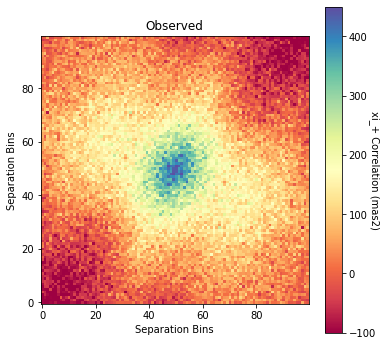

In [2]:
GP = cfGPR.CurlFreeGPR()
GP.load_fits("hoid")
GP.extract_data(465)
GP.sigma_clip()
GP.split_data(train_size=0.50)
print(GP.nData, GP.nTrain, GP.nTest)

x = GP.Xtest[:, 0]*u.deg
y = GP.Xtest[:, 1]*u.deg
dx = GP.Ytest[:, 0]*u.mas
dy = GP.Ytest[:, 1]*u.mas
err = GP.Etest[:, 0]*u.mas

plotGPR.AstrometricResiduals(x, y, dx, dy, err)
plotGPR.DivCurl(x, y, dx, dy, err)
plotGPR.Correlation(x, y, dx, dy, xiplus_ON=True)
plotGPR.Correlation2D(x, y, dx, dy)

In [3]:
"""This cell contains everything for doing correlation fitting but I've just grabbed the optimized parameter values for exposure 465 from another notebook."""

# ""def fit_vonKarman(X, variance, outerScale, diameter, wind_x, wind_y):
    
#     theta = {
#         'var': variance,
#         'oS': outerScale,
#         'd': diameter,
#         'wind_x': wind_x,
#         'wind_y': wind_y
#     }
#     params = ' '.join(
#         [f"{name:>8}: {x:<9.6f}" for name, x in theta.items()])
# #     with open("params.out", mode='a+') as file:
# #         file.write(params + '\n')
#     print(params)
    
#     # Undo formatting of the grid.
#     xx = X[0].reshape((int(np.sqrt(X[0].shape[0])),
#                        int(np.sqrt(X[0].shape[0]))))
#     yy = X[1].reshape((int(np.sqrt(X[1].shape[0])),
#                        int(np.sqrt(X[1].shape[0]))))
    
#     ttt = vk.TurbulentLayer(
#         variance=variance,
#         outerScale=outerScale,
#         diameter=diameter,
#         wind=(wind_x, wind_y))
    
#     # Caulculate covariance function, xi_plus, and return it.
#     Cuv = ttt.getCuv(xx, yy)
#     xiplus = Cuv[:, :, 0, 0] + Cuv[:, :, 1, 1]
#     xiplus = np.where(np.isnan(xiplus), 0, xiplus)
    
#     return xiplus.ravel(order='C')



# # bounds = np.array([
# #     (1, 1000),
# #     (0.1, 5),
# #     (0.01, 0.25),
# #     (-3, 3),
# #     (-3, 3),
# # ]).T



# rmax = 5*u.arcmin
# nBins = 50

# xiplus = plotGPR.calcCorrelation2D(x, y, dx, dy, rmax=rmax, nBins=nBins)[0]
# xiplus = np.where(np.isnan(xiplus), 0, xiplus)



# dx = (rmax / (nBins / 2)).to(u.deg).value
# x = np.arange(-nBins / 2, nBins / 2) * dx
# xx, yy = np.meshgrid(x, x)

# def figureOfMerit(params):
#     ttt = vk.TurbulentLayer(
#         variance=params[0],
#         outerScale=params[1],
#         diameter=params[2],
#         wind=(params[3], params[4]))
    
#     Cuv = ttt.getCuv(xx, yy)
#     xiplus_model = Cuv[:, :, 0, 0] + Cuv[:, :, 1, 1]
#     xiplus_model = np.where(np.isnan(xiplus_model), 0, xiplus_model)
    
#     chisq = np.mean((xiplus - xiplus_model)**2)
    
#     theta = {
#         "fom": chisq,
#         'var': params[0],
#         'oS': params[1],
#         'd': params[2],
#         'wind_x': params[3],
#         'wind_y': params[4]
#     }
#     theta = ' '.join(
#         [f"{name:>8}: {x:<9.6f}" for name, x in theta.items()]
#     )
#     print(theta)
    
#     return chisq



# v0 = np.array([
#     500,
#     1,
#     0.1,
#     0.05,
#     0.05
# ])

# simplex0 = np.vstack([v0, np.vstack([v0]*5) + np.diag(v0*0.15)])


# options = {
#     "initial_simplex": simplex0,
#     "fatol": 25,
#     "xatol": 5
# }

# opt_result = opt.minimize(
#     figureOfMerit,
#     simplex0[0],
#     method='Nelder-Mead',
#     options=options
# )""

params = np.array([
    3.77403243e+02,
    1.55965199e+00,
    9.89875236e-02,
    7.09424548e-02,
    1.09184000e-01]
)

In [4]:
def getGrid(X1, X2):
    u1, u2 = X1[:, 0], X2[:, 0]
    v1, v2 = X1[:, 1], X2[:, 1]
    uu1, uu2 = np.meshgrid(u1, u2)
    vv1, vv2 = np.meshgrid(v1, v2)
    
    return uu1 - uu2, vv1 - vv2

In [5]:
# Initialize a von Karman model with the parameters from the optimizer.
ttt = vk.TurbulentLayer(
    variance=params[0],
    outerScale=params[1],
    diameter=params[2],
    wind=(params[3], params[4]))

/home/austinfortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: divide by zero encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/austinfortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: invalid value encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/austinfortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: divide by zero encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)
/home/austinfortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: invalid value encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)


In [6]:
du, dv = getGrid(GP.Xtrain, GP.Xtrain)
Cuv = ttt.getCuv(du, dv, workers=37)
Ku = Cuv[:,:,0,0]
Kv = Cuv[:,:,1,1]

In [7]:
du, dv = getGrid(GP.Xtest, GP.Xtrain)
Cuv = ttt.getCuv(du, dv, workers=37)
Ks_u = Cuv[:,:,0,0]
Ks_v = Cuv[:,:,1,1]

In [8]:
Wu = np.diag(GP.Etrain[:, 0]**2)
Wv = np.diag(GP.Etrain[:, 1]**2)

In [9]:
Lu = np.linalg.cholesky(Ku + Wu)
Lv = np.linalg.cholesky(Kv + Wv)

In [10]:
alpha_u = np.linalg.solve(Lu.T, np.linalg.solve(Lu, GP.Ytrain[:, 0]))
alpha_v = np.linalg.solve(Lv.T, np.linalg.solve(Lv, GP.Ytrain[:, 1]))

In [11]:
fbar_s_u = np.dot(Ks_u.T, alpha_u)
fbar_s_v = np.dot(Ks_v.T, alpha_v)

In [12]:
GP.fbar_s = np.vstack((fbar_s_u, fbar_s_v)).T

In [13]:
x = GP.Xtest[:, 0]*u.deg
y = GP.Xtest[:, 1]*u.deg
dx = GP.Ytest[:, 0]*u.mas
dy = GP.Ytest[:, 1]*u.mas
err = GP.Etest[:, 0]*u.mas

x2 = GP.Xtest[:, 0]*u.deg
y2 = GP.Xtest[:, 1]*u.deg
dx2 = GP.Ytest[:, 0]*u.mas - GP.fbar_s[:, 0]*u.mas
dy2 = GP.Ytest[:, 1]*u.mas - GP.fbar_s[:, 1]*u.mas
err2 = GP.Etest[:, 0]*u.mas

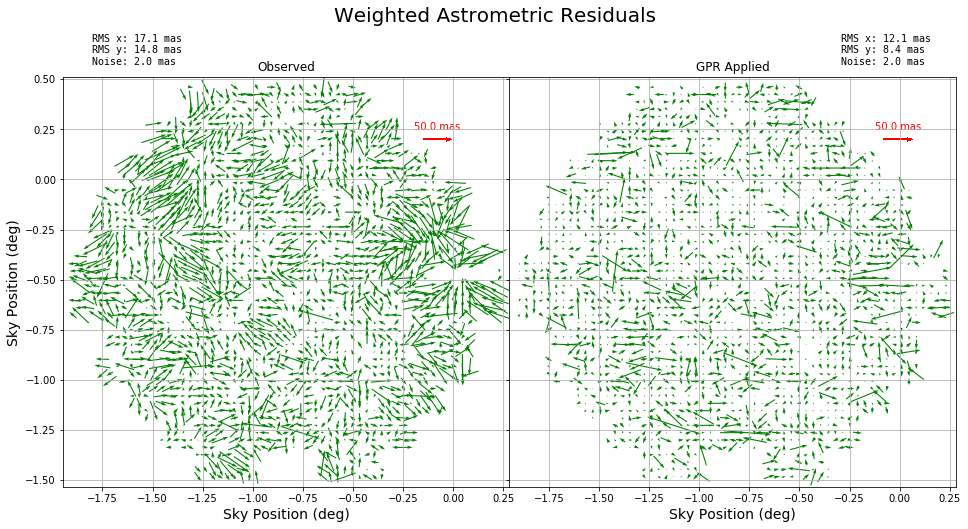

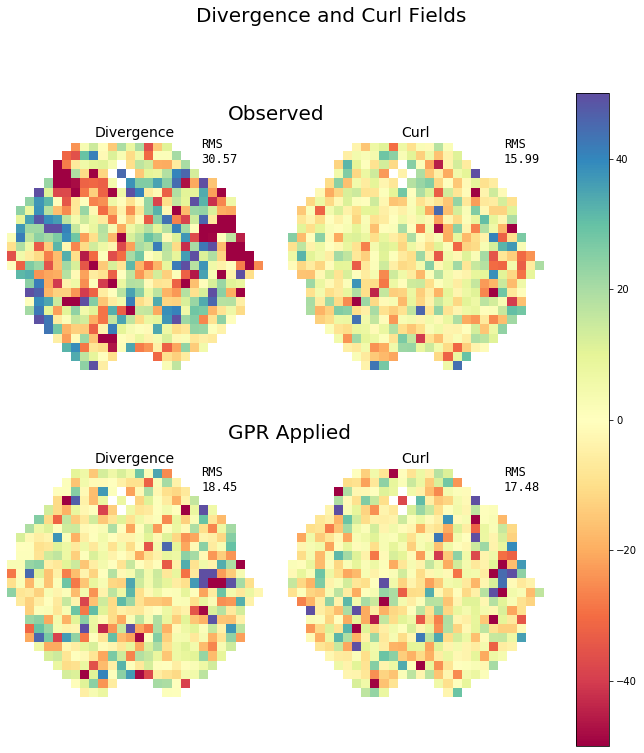

4069 Stars Evaluated...
For the first 39 separation bins...
                    E-Mode    B-Mode    xi_+      
Mean Observed       429.594   -6.812    422.782   
Mean GPR Applied    87.777    35.212    122.989   

Std  Observed       131.267   143.783   190.879   
Std  GPR Applied    41.876    35.894    63.567    

Mean Ratio          4.894     0.193     3.438     


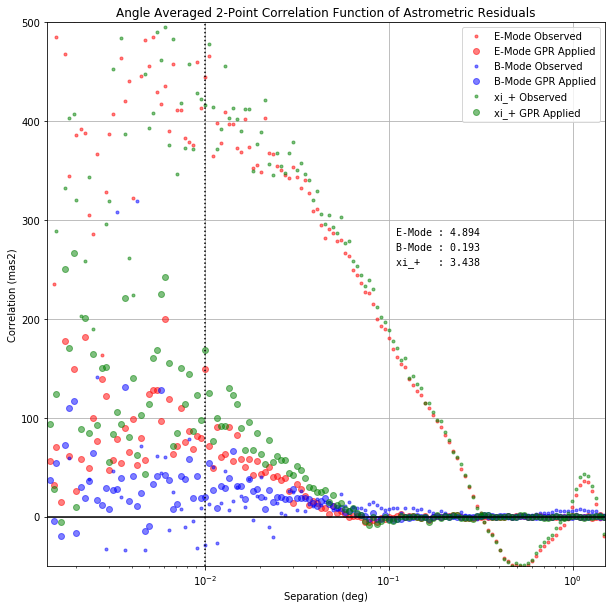

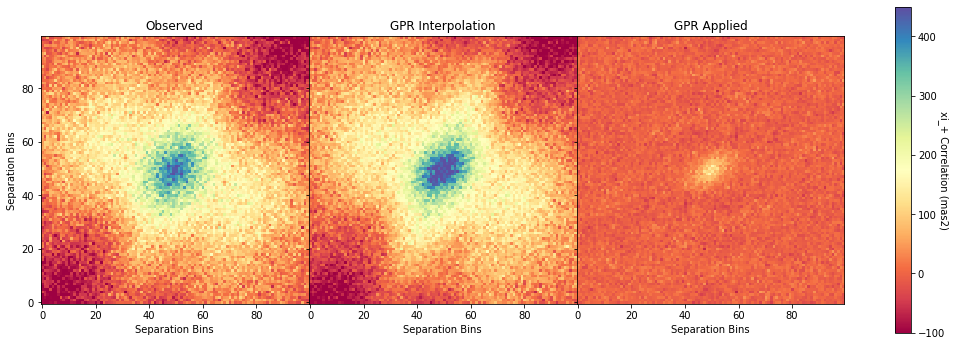

In [14]:
plotGPR.AstrometricResiduals(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2)

plotGPR.DivCurl(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2)

plotGPR.Correlation(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    xiplus_ON=True)

plotGPR.Correlation2D(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2)

In [54]:
def vK2KGPR_basic_figureOfMerit(params):
    ttt = vk.TurbulentLayer(
        variance=params[0],
        outerScale=params[1],
        diameter=params[2],
        wind=(params[3], params[4]))
    
    du, dv = getGrid(GP.Xtrain, GP.Xtrain)
    Cuv = ttt.getCuv(du, dv)
    Cuv[:, :, 0, 1] *= 0
    Cuv[:, :, 0, 1] *= 0
    n1, n2 = Cuv.shape[0], Cuv.shape[1]
    K = np.swapaxes(Cuv, 1, 2).reshape(2*n1, 2*n2)

    du, dv = getGrid(GP.Xtest, GP.Xtrain)
    Cuv = ttt.getCuv(du, dv)
    Cuv[:, :, 0, 1] *= 0
    Cuv[:, :, 0, 1] *= 0
    n1, n2 = Cuv.shape[0], Cuv.shape[1]
    Ks = np.swapaxes(Cuv, 1, 2).reshape(2*n1, 2*n2)
    
    W = GP.white_noise_kernel(GP.Etrain)
    
    L = np.linalg.cholesky(K + W)
    
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, GP.flat(GP.Ytrain)))
    
    GP.fbar_s = GP.unflat(np.dot(Ks.T, alpha))
    

#     du, dv = getGrid(GP.Xtrain, GP.Xtrain)
#     Cuv = ttt.getCuv(du, dv, workers=40)
#     Ku = Cuv[:,:,0,0]
#     Kv = Cuv[:,:,1,1]

#     du, dv = getGrid(GP.Xtest, GP.Xtrain)
#     Cuv = ttt.getCuv(du, dv, workers=40)
#     Ks_u = Cuv[:,:,0,0]
#     Ks_v = Cuv[:,:,1,1]

#     Wu = np.diag(GP.Etrain[:, 0]**2)
#     Wv = np.diag(GP.Etrain[:, 1]**2)

#     Lu = np.linalg.cholesky(Ku + Wu)
#     Lv = np.linalg.cholesky(Kv + Wv)

#     alpha_u = np.linalg.solve(Lu.T, np.linalg.solve(Lu, GP.Ytrain[:, 0]))
#     alpha_v = np.linalg.solve(Lv.T, np.linalg.solve(Lv, GP.Ytrain[:, 1]))

#     fbar_s_u = np.dot(Ks_u.T, alpha_u)
#     fbar_s_v = np.dot(Ks_v.T, alpha_v)

#     GP.fbar_s = np.vstack((fbar_s_u, fbar_s_v)).T

    # My way
    res = GP.Ytest - GP.fbar_s
    rMax = (0.2*u.deg).to(u.deg).value
    rMin = (5*u.mas).to(u.deg).value
    r = np.linspace(rMin, rMax, 100)
    kdt = cKDTree(GP.Xtest)
    xiplus = np.zeros(r.shape)
    for i, radius in enumerate(r):
        prsmax = kdt.query_pairs(r[i], output_type='ndarray')
        xiplus[i] = np.nanmean(res[prsmax][:, 0, :] * res[prsmax][:, 1, :])
    xiplus = np.nanmean(xiplus)


    # Prof method
#     res = GP.Ytest - GP.fbar_s
#     rMax = (0.02*u.deg).to(u.deg).value
#     rMin = (5*u.mas).to(u.deg).value
#     kdt = cKDTree(GP.Xtest)
#     prs_set = kdt.query_pairs(rMax, output_type='set')
#     prs_set -= kdt.query_pairs(rMin, output_type='set')
#     prs = np.array(list(prs_set))
#     xiplus = np.mean(np.sum(res[prs[:, 0]] * res[prs[:, 1]], axis=1))

    # Prof method but at larger separations
#     res = GP.Ytest - GP.fbar_s
#     rMax = (0.2*u.deg).to(u.deg).value
#     rMin = (5*u.mas).to(u.deg).value
#     kdt = cKDTree(GP.Xtest)
#     prs_set = kdt.query_pairs(rMax, output_type='set')
#     prs_set -= kdt.query_pairs(rMin, output_type='set')
#     prs = np.array(list(prs_set))
#     xiplus = np.mean(np.sum(res[prs[:, 0]] * res[prs[:, 1]], axis=1))

    theta = {
        "xiplus": xiplus,
        'var': params[0],
        'oS': params[1],
        'd': params[2],
        'wind_x': params[3],
        'wind_y': params[4]
    }
    theta = ' '.join(
        [f"{name:>8}: {x:<10.6f}" for name, x in theta.items()])
    with open("vK2KGPR_basic.out", mode="a+") as file:
        file.write(theta + "\n")
    print(theta)

    return xiplus

In [ ]:
if os.path.exists("vK2KGPR_basic.out"):
    os.remove("vK2KGPR_basic.out")
v0 = params
simplex0 = np.vstack([v0, np.vstack([v0]*5) + np.diag(v0*0.15)])

options = {
    "initial_simplex": simplex0,
    "fatol": 0.1,
    "xatol": 0.01
}

opt_result_GP = opt.minimize(
    vK2KGPR_basic_figureOfMerit,
    simplex0[0],
    method='Nelder-Mead',
    options=options
)

/home/austinfortino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice


  xiplus: 14.922892       var: 377.403243       oS: 1.559652          d: 0.098988     wind_x: 0.070942     wind_y: 0.109184  
  xiplus: 14.713832       var: 434.013729       oS: 1.559652          d: 0.098988     wind_x: 0.070942     wind_y: 0.109184  
  xiplus: 15.045233       var: 377.403243       oS: 1.793600          d: 0.098988     wind_x: 0.070942     wind_y: 0.109184  
  xiplus: 15.432869       var: 377.403243       oS: 1.559652          d: 0.113836     wind_x: 0.070942     wind_y: 0.109184  
  xiplus: 15.251883       var: 377.403243       oS: 1.559652          d: 0.098988     wind_x: 0.081584     wind_y: 0.109184  
  xiplus: 15.060944       var: 377.403243       oS: 1.559652          d: 0.098988     wind_x: 0.070942     wind_y: 0.125562  
  xiplus: 13.753455       var: 400.047438       oS: 1.653231          d: 0.084139     wind_x: 0.075199     wind_y: 0.115735  
  xiplus: 12.800138       var: 411.369535       oS: 1.700021          d: 0.069291     wind_x: 0.077327     wind_y: 0.1

In [ ]:
x = GP.Xtest[:, 0]*u.deg
y = GP.Xtest[:, 1]*u.deg
dx = GP.Ytest[:, 0]*u.mas
dy = GP.Ytest[:, 1]*u.mas
err = GP.Etest[:, 0]*u.mas

x2 = GP.Xtest[:, 0]*u.deg
y2 = GP.Xtest[:, 1]*u.deg
dx2 = GP.Ytest[:, 0]*u.mas - GP.fbar_s[:, 0]*u.mas
dy2 = GP.Ytest[:, 1]*u.mas - GP.fbar_s[:, 1]*u.mas
err2 = GP.Etest[:, 0]*u.mas

In [ ]:
plotGPR.AstrometricResiduals(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    savePath="."
)

plotGPR.DivCurl(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    savePath="."
)

plotGPR.Correlation(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    savePath="."
)

plotGPR.Correlation2D(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    savePath="."
)